# 1.数据集

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

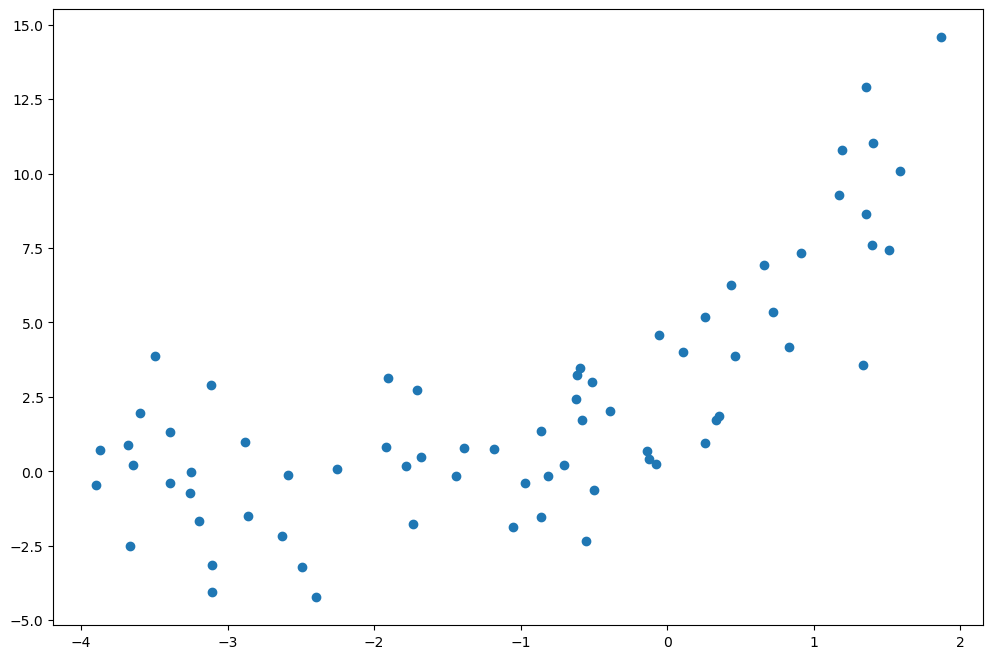

In [215]:
np.random.seed(233)
m =100
x_min,x_max = -4, 2
x = np.random.uniform(x_min,x_max, size = m)
# np.random.normal(10,100,20) 均值10,标准差 1000, 生成20个
y = x ** 2 + 4 * x + 3 + 2*np.random.normal(0,1,m)
y_min,y_max = y.min(),y.max()


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233)
X_train = x_train.reshape(-1, 1)
plt.scatter(x_train,y_train)
plt.show()


# 2. 线性回归和多项式回归

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Degree:  1, Train data Score(R²): 0.518, Test data Score(R²):    0.467
Degree:  2, Train data Score(R²): 0.744, Test data Score(R²):    0.814
Degree:  5, Train data Score(R²): 0.753, Test data Score(R²):    0.821
Degree: 20, Train data Score(R²): 0.809, Test data Score(R²):  -12.073


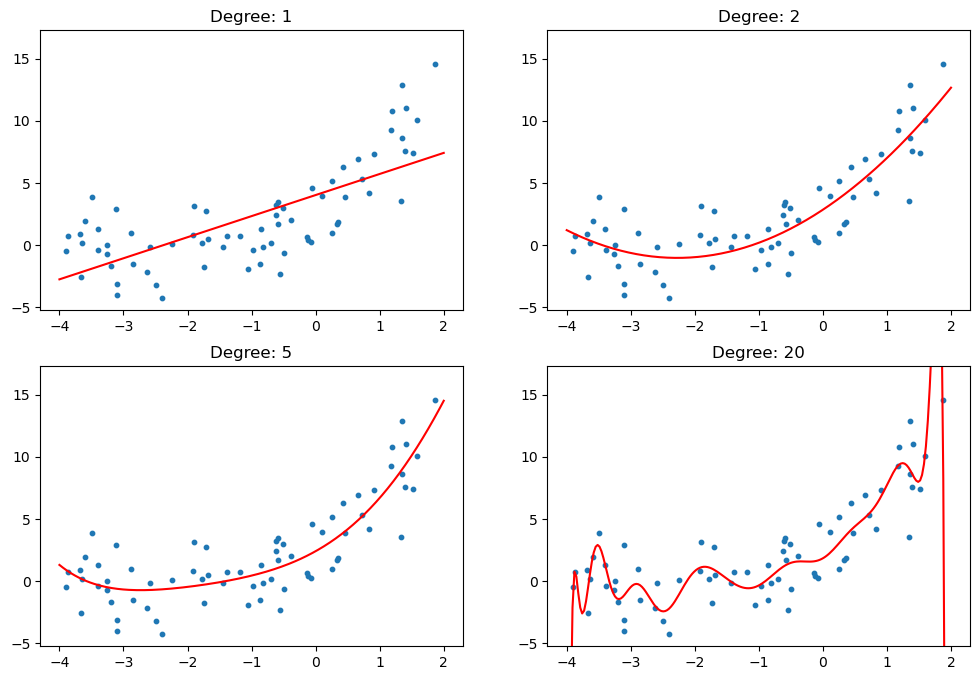

In [217]:
plt.rcParams["figure.figsize"] = (12, 8)

degrees = [1, 2, 5, 20]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    X_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(x_test.reshape(-1, 1))

    linear_regression = LinearRegression()
    linear_regression.fit(X_poly, y_train)

    X_new = np.linspace(x_min,x_max, 200).reshape(-1, 1)
    X_new_poly = polynomial_features.fit_transform(X_new)
    y_predict = linear_regression.predict(X_new_poly)
    
    plt.subplot(2, 2, i + 1)
    plt.title("Degree: {0}".format(degree))
    plt.scatter(x_train, y_train, s = 10)
    plt.ylim(y_min-1, y_max+1)
    plt.plot(X_new, y_predict, color = "red")

    print("Degree: {:2d}, Train data Score(R²): {:4.3f}, Test data Score(R²): {:8.3f}".format(
        degree, linear_regression.score(X_poly, y_train), linear_regression.score(X_test_poly, y_test)))

plt.show()

# 3. 学习曲线

## y轴使用MSE

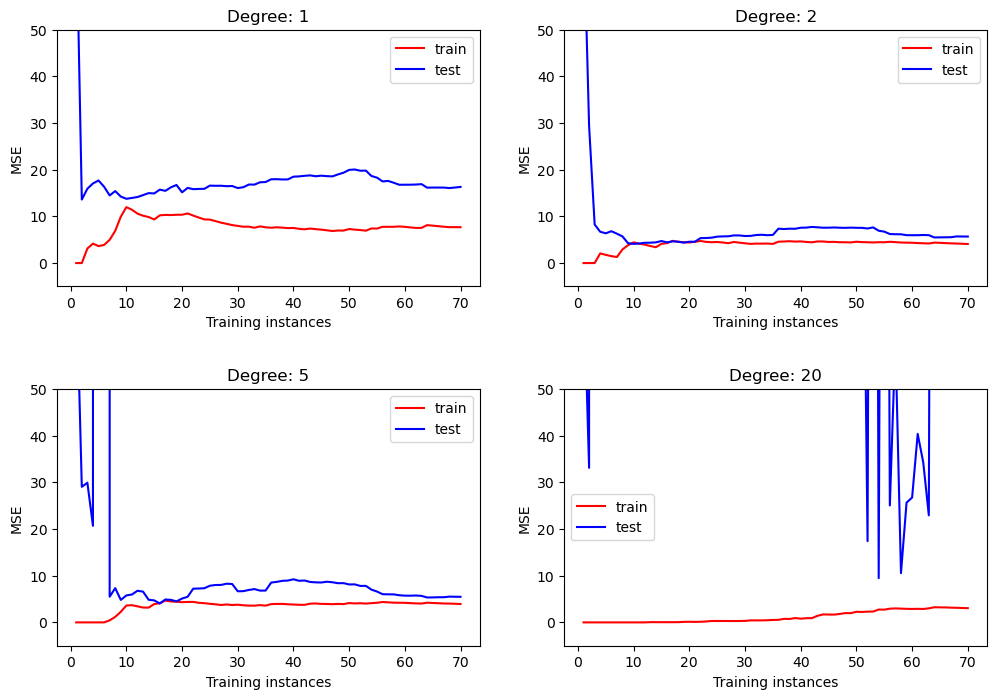

In [218]:
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (12, 8)

degrees = [1, 2, 5, 20]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    
    X_poly_train = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    X_poly_test = polynomial_features.fit_transform(x_test.reshape(-1, 1))
    
    train_error, test_error = [], []
    for k in range(len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(X_poly_train[:k + 1], y_train[:k + 1])

        y_train_pred = linear_regression.predict(X_poly_train[:k + 1])
        train_error.append(mean_squared_error(y_train[:k + 1], y_train_pred))

        y_test_pred = linear_regression.predict(X_poly_test)
        test_error.append(mean_squared_error(y_test, y_test_pred))
    

    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(hspace=0.4)  # 增大行间距
    plt.title("Degree: {0}".format(degree))
    plt.xlabel("Training instances")
    plt.ylabel("MSE")
    plt.ylim(-5, 50)
    plt.plot([k + 1 for k in range(len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k + 1 for k in range(len(x_train))], test_error, color = "blue", label = 'test')
    plt.legend()

plt.show()

## y轴使用R²

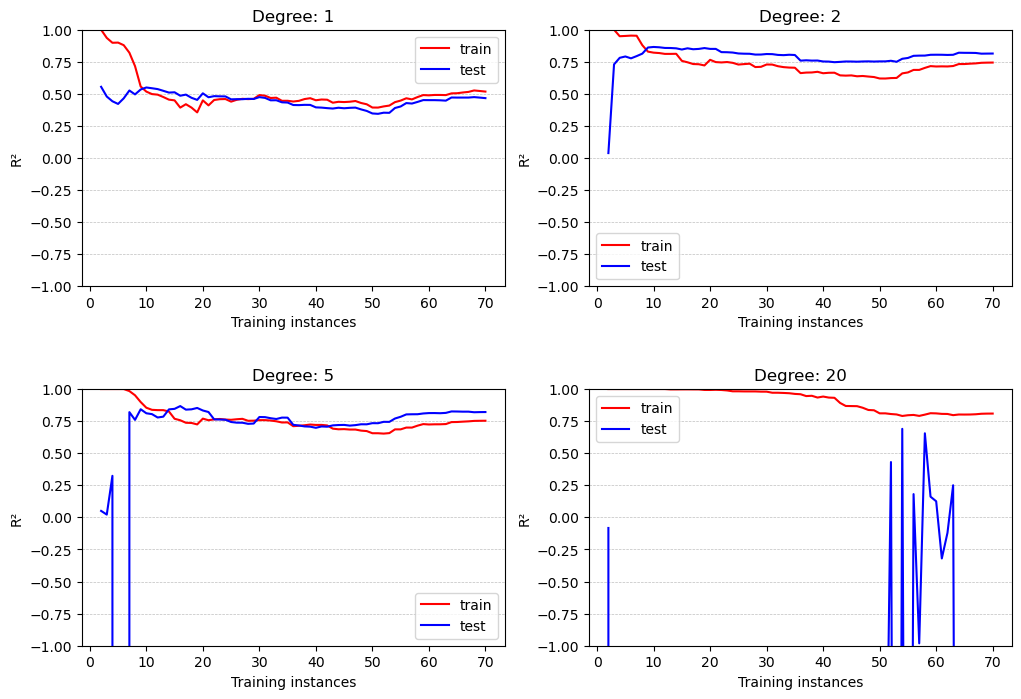

In [219]:
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (12, 8)

degrees = [1, 2, 5, 20]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    
    X_poly_train = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    X_poly_test = polynomial_features.fit_transform(x_test.reshape(-1, 1))
    
    train_error, test_error = [], []
    for k in range(1, len(x_train)):
        linear_regression = LinearRegression()
        linear_regression.fit(X_poly_train[:k + 1], y_train[:k + 1])

        train_error.append(linear_regression.score(X_poly_train[:k + 1], y_train[:k + 1]))
        test_error.append(linear_regression.score(X_poly_test, y_test))
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(hspace=0.4)  # 增大行间距
    plt.title("Degree: {0}".format(degree))
    plt.xlabel("Training instances")
    plt.ylabel("R²")
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  # 仅显示水平网格（y 轴方向）
    plt.ylim(-1, 1)
    plt.plot([k + 1 for k in range(1, len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k + 1 for k in range(1, len(x_train))], test_error, color = "blue", label = 'test')
    plt.legend()

plt.show()
# 欠拟合（Degree1）：
    # 特征：双曲线误差值整体较大（R²约0.5）
    # 表现：训练/测试误差均未收敛到理想值
# 适度拟合（Degree2/5）：
    # 特征：误差值较小（R²>0.7）且稳定
    # 最佳表现：Degree2的双曲线gap最小
# 过拟合（Degree20）：
    # 特征：训练误差极低但测试误差波动大
    # 典型表现：测试集R²出现负值（模型失效）